# **Advertising Sales Channel Prediction**

## 1.Exploring the data set

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [38]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv",index_col=[0])

In [39]:
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [40]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [41]:
df.shape

(200, 4)

## 2.EDA

1.Drawing kdeplot to check the distribution of the data 

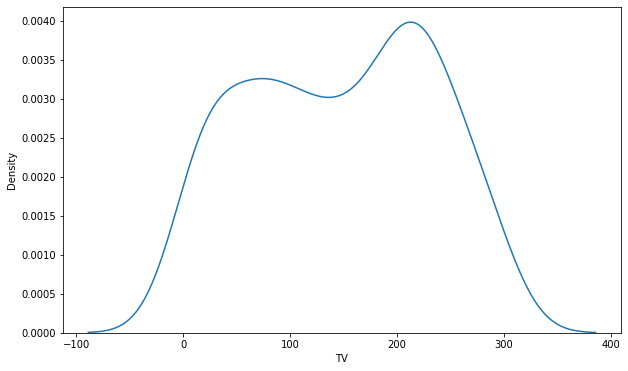

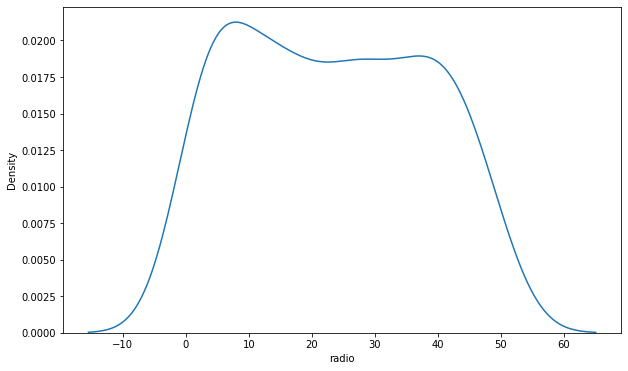

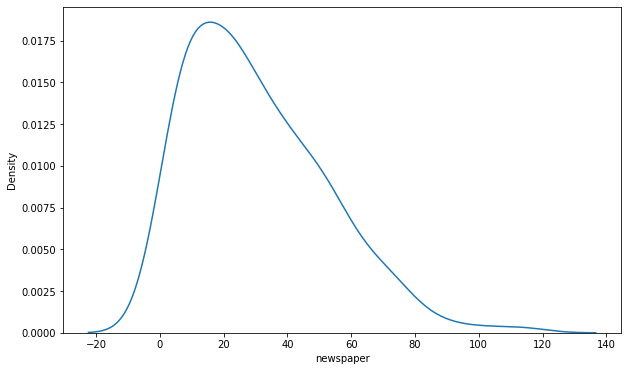

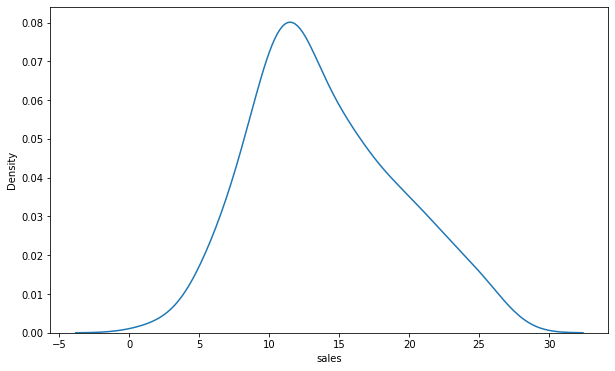

In [42]:
for i in df.columns:
  plt.figure(figsize=[10,6])
  sns.kdeplot(df[i])

**Inference:** All the data are normally distributed except Newspaper column.

1.Using box plot to find if any outliers present

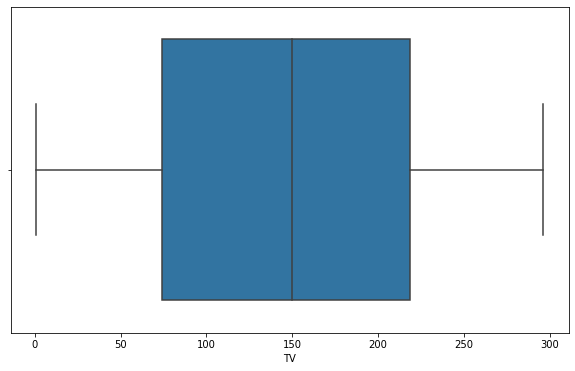

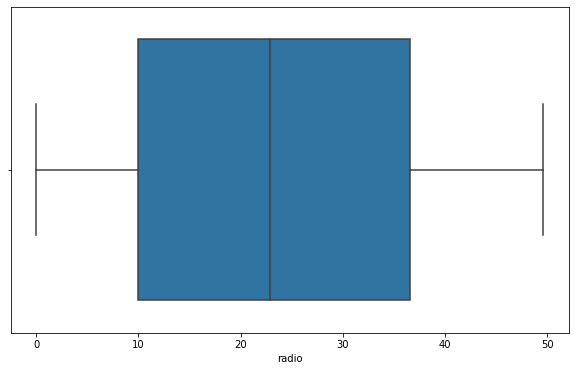

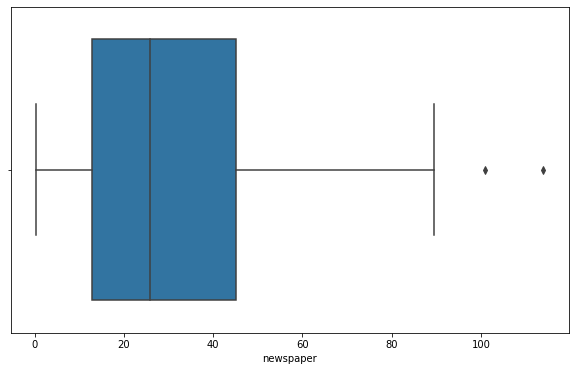

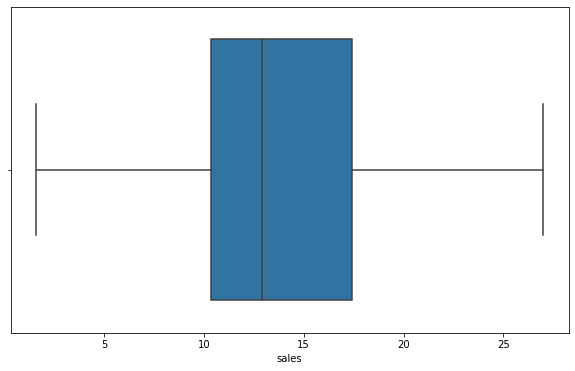

In [43]:
for i in df.columns:
  plt.figure(figsize=(10,6))
  sns.boxplot(df[i])

**Inference:**  There are few outliers present in Newspaper column.

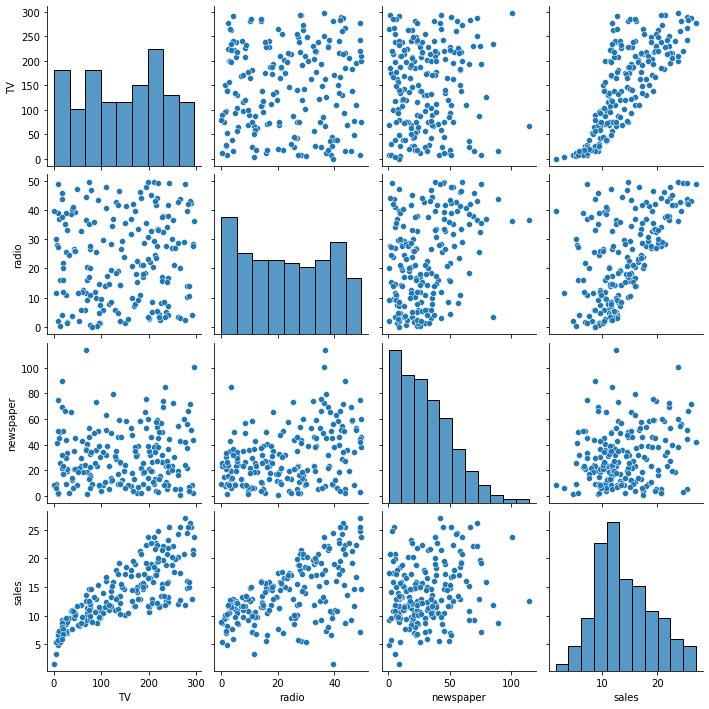

In [44]:
sns.pairplot(df)

3.using boxplot to find the column relationship with dependent variable

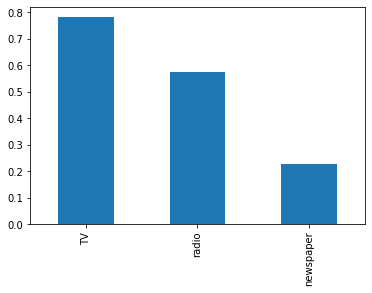

In [45]:
df.corr()['sales'].sort_values(ascending=False).drop(['sales']).plot(kind='bar')

**Inference:**  Advertisement on the TV gives more impact on sales.

4.using heat map to find the relationship between the columns

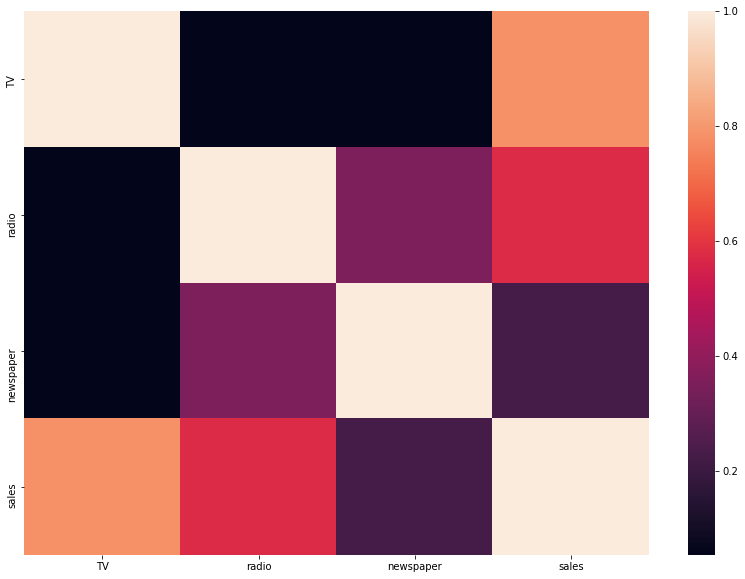

In [46]:
df_corr=df.corr()
plt.figure(figsize=[14,10])
sns.heatmap(df_corr)

**Inference:** Ad in TV increases the sale than radio or newspaper.

TV>Radio>Newspaper

In [47]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


## **3.Feature Engineering**

### 1.Checking for null values

In [48]:
print(df.isnull().sum())

TV           0
radio        0
newspaper    0
sales        0
dtype: int64


**INFERENCE:** No null values are present in data.

### 2.skewness and outlier removal

In [49]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

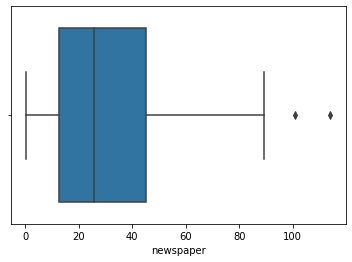

In [50]:
sns.boxplot(df['newspaper'])

**Inference:** The skewness is highly present in newspaper data because of the outlier.

So replacing the Outler with the 75th percentile value.

In [51]:
#75th percentile value is 45
df["newspaper"] = np.where(df["newspaper"] >85, 45,df['newspaper'])

Replacing the outlier value with 75th percentile value

In [52]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.571479
sales        0.407571
dtype: float64

now outlier is removed

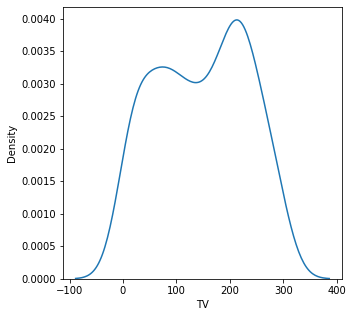

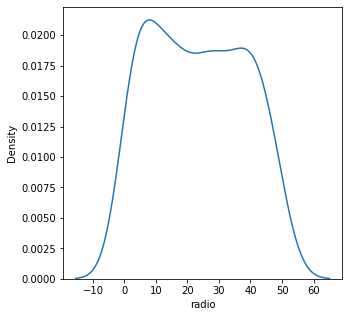

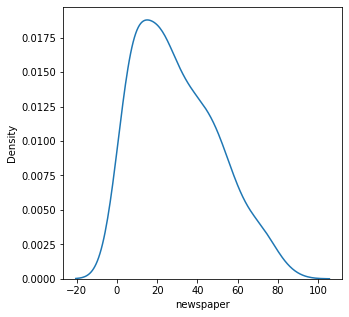

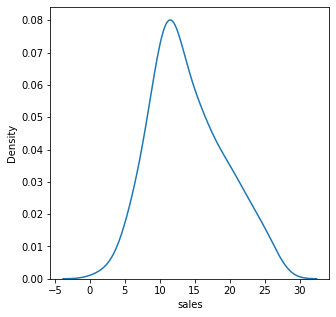

In [53]:
for i in df.columns:
  plt.figure(figsize=[5,5])
  sns.kdeplot(df[i])

**Inference:** Now skewness is reduced.

### 3.checking for the linear relationship with dependent variable

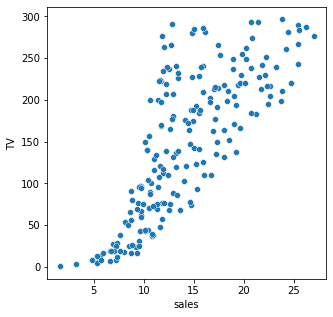

In [54]:
plt.figure(figsize=[5,5])
sns.scatterplot(x='sales',y='TV',data=df)

**Inference:** There is a linear relationship between Sales and TV.

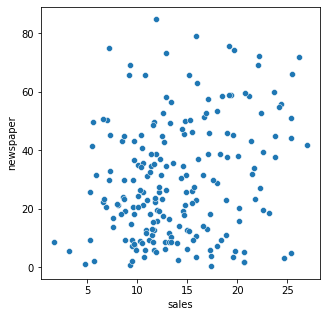

In [55]:
plt.figure(figsize=[5,5])
sns.scatterplot(x='sales',y='newspaper',data=df)

**Inference:** There is a no linear relationship between Sales and Newspaper.

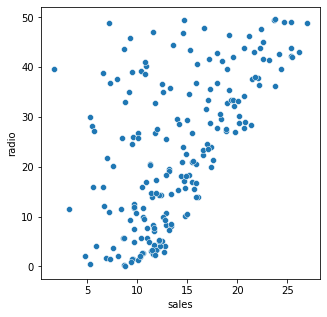

In [56]:
plt.figure(figsize=[5,5])
sns.scatterplot(x='sales',y='radio',data=df)

**Inference:** There is a not much of linear relationship between Sales and Radio.

## **4. Model Construction**

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

### Test Train split

In [58]:
from sklearn.model_selection import train_test_split

x= df.drop(columns='sales')
y= df['sales']

### FINDING BEST RANDOM STATE for linear regression 

In [59]:
#FINDING BEST RANDOM STATE

from sklearn.metrics import r2_score
d=5
lm = LinearRegression(fit_intercept=True, normalize=True)
for i in range(0,100):
  x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=i)
  lm.fit(x_train,y_train)
  pred_train=lm.predict(x_train)
  pred_test = lm.predict(x_test)
  a=r2_score(y_train,pred_train)
  b=r2_score(y_test,pred_test)
  c=a-b
  print(i,c)
  if d>=c:
    d=c
    print("least value",i,d)

0 0.04627869335388224
least value 0 0.04627869335388224
1 0.0049750189925483745
least value 1 0.0049750189925483745
2 0.16282267647127247
3 -0.01925527816037287
least value 3 -0.01925527816037287
4 -0.016876729451987815
5 -0.0029293867922668415
6 -0.029300259134971807
least value 6 -0.029300259134971807
7 -0.01644337892044112
8 0.06202789896036054
9 -0.03615993676995477
least value 9 -0.03615993676995477
10 0.08595840020257106
11 0.06520206699043074
12 -0.02255643813342767
13 -0.0445324608925336
least value 13 -0.0445324608925336
14 0.05374642685296949
15 -0.011691616282583195
16 -0.026331717879032213
17 0.08612791399446418
18 0.035940644456290416
19 -0.010779289584049057
20 -0.007710840667955354
21 -0.03425000384410626
22 -0.028549734451653652
23 -0.018064193481010293
24 -0.011511802521328662
25 0.02515184658538716
26 0.026101320093809277
27 -0.008104113814449532
28 0.014838139083732993
29 -0.022916742018732505
30 -0.012226201192179653
31 -0.04130502631271704
32 0.14099477491314805
33

The best Random state is 92 for Linear Regression

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=92)

### **2.Scaling the Data**

In [61]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(x_train)

# transform training data
x_train_norm = norm.transform(x_train)

# transform testing dataabs
x_test_norm = norm.transform(x_test)

In [62]:
x_test=pd.DataFrame(x_test_norm)
x_train=pd.DataFrame(x_train_norm)


In [63]:
x_train.describe()

,0,1,2
count,160.000000,160.000000,160.000000
mean,0.491937,0.465864,0.366342
std,0.291873,0.306206,0.243557
min,0.000000,0.000000,0.000000
25%,0.235205,0.187500,0.161597
50%,0.518600,0.445565,0.320659
75%,0.734444,0.747480,0.559886
max,1.000000,1.000000,1.000000


### **Model**

**LinearRegression**

In [64]:
lm = LinearRegression(fit_intercept=True, normalize=True)
lm.fit(x_train, y_train)

lr_pred=lm.predict(x_test)
print(lm.score(x_test, y_test))
print("mean square error is : ",mean_squared_error(lm.predict(x_test), y_test))
print("                ")
print("r2 score  :   ",r2_score(y_test, lr_pred))
cv_score=cross_val_score(lm, x, y, cv=10)
cv_mean=cv_score.mean()
print("cv score  :   ",cv_mean)

0.9513771951626555
mean square error is :  1.5017758020149035
                
r2 score  :    0.9513771951626554
cv score  :    0.8853898674514633


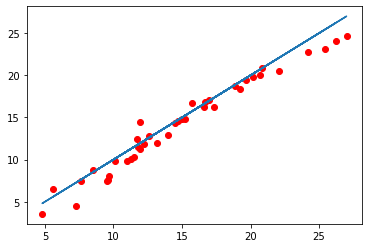

In [65]:
import matplotlib.pyplot as plt
plt.scatter(x=y_test,y=lr_pred,color='r')
plt.plot(y_test,y_test)

**Lasso Regression**

In [66]:
lasm = Lasso(fit_intercept=True, normalize=True, alpha=0.5)
lasm.fit(x_train, y_train)

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [67]:
from sklearn.linear_model import Lasso
parameters = {'alpha':[.0001,.001,0.01,0.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters,cv=5)
clf.fit(x_train, y_train)
print(clf.best_params_)

{'alpha': 0.01, 'random_state': 0}


In [68]:
ls=Lasso(alpha=0.01,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)

print("mean square error is : ",mean_squared_error(ls.predict(x_test), y_test))

lss=r2_score(y_test,pred_ls)
print("r2 score  :   ",lss)

cv_score=cross_val_score(ls, x, y, cv=10)
cv_mean=cv_score.mean()
print("cv score  :   ",cv_mean)

mean square error is :  1.5009057606882386
r2 score  :    0.9514053643804375
cv score  :    0.885403269707498
mean square error is :  1.5009057606882386
r2 score  :    0.9514053643804375
cv score  :    0.885403269707498


### Random Forest Regressor

In [69]:
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
parameters = {'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters,cv=5)
clf.fit(x_train, y_train)
print(clf.best_params_)



{'criterion': 'mae', 'max_features': 'auto'}


In [72]:
rf=RandomForestRegressor(criterion= 'mae', max_features= 'auto')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_rf=rf.predict(x_test)

print("mean square error is : ",mean_squared_error(ls.predict(x_test), y_test))

rfs=r2_score(y_test,pred_rf)
print("r2 score  :   ",rfs)

cv_score=cross_val_score(rf, x, y, cv=10)
cv_mean=cv_score.mean()
print("cv score  :   ",cv_mean)

mean square error is :  1.5009057606882386
r2 score  :    0.9831052926272398
cv score  :    0.9800214066963221


### **We are getting R2 score and cv score as 0.98 and 0.97 respectively.This shows our model is performing best in Random Forest Regressor.**

In [73]:
import joblib
joblib.dump(rf,"final model.pkl")

['final model.pkl']